# Relatório Intermediário - Alinhamento de Sequencias de DNA
### Super Computação
Aluna: Ana Clara Carneiro de Freitas

Este projeto foi desenvolvido com o intuito de testar e desenvolver diversas estratégias para realizar o alinhamento de sequências de DNA, o qual consiste em comparar duas sequências de bases para observar seu nível de similaridade. Tal similaridade é calculada por meio dos acertos (matchs), os quais contribuem com um sinal positivo nessa similaridade, e dos erros (gaps e mismatchs), que contribuem negativamente.

Dessa maneira, visando encontrar um alinhamento que maximize esse nível de similaridade, foram implementadas três estratégias, sendo elas uma Solução Heurística, uma Busca Local e, por fim, uma Busca Exaustiva.

Imports do projeto:

In [ ]:
import subprocess
import time
import random
import numpy as np
import matplotlib.pyplot as plt

Função feita para rodar os algoritmos e calcular suas saídas e tempo de duração do programa:

In [ ]:
def roda_com_entrada(ex, in_f):
    with open(in_f) as f:
        start = time.perf_counter()
        proc = subprocess.run([ex], input=f.read(), text=True, capture_output=True)
        end = time.perf_counter()

    return proc.stdout, end-start

Todos os arquivos rodam com uma entrada que segue o mesmo padrão, sendo ela:
- o tamanho da primeira sequência
- o tamanho da segunda sequência
- a primeira sequência 
- a segunda sequência

---------------------
### Solução Heurística de Alinhamento Local de Smith-Waterman

A primeira estratégia implementada foi a heurística, a qual realiza seu alinhamento de sequências de DNA por meio do algoritmo smith-waterman. Esta, para encontrar um alinhamento local otimo, realiza o calculo da diagonal, deleção e inserção de cada um dos elementos da matriz, para assim, descobrir o maior valor entre eles e encontrar o melhor alinhamento das sequencias.
A imagem abaixo exemplifica de forma mais clara como esse caminho é montado na matriz.

<img src="./Imagens/sw.jpg">

Inicialmente, visando averiguar a performance do algoritmo em relação ao tamanho da entrada, foram criados diversos arquivos que possuem sequencias com tamanhos diferentes, desde muito pequenos à muito grandes, para testar todos os tipos de cenários.

In [6]:

valores_n = []

for i in range(5,605,30):
    for j in range(0, 30, 5):
        random.seed(10)
        n = i # tamanho da primeira sequência
        m = random.randint(i,650) # tamanho da segunda sequência
        

        file = './Entradas/input'+ str(i) + '_'+ str(j)# nome do arquivo a ser gerado
        f = open(file, 'w')
        seq=[str(n)+'\n',
            str(m)+'\n',
            ''.join(random.choices(['A','T','C','G','-'],k=n))+'\n',
            ''.join(random.choices(['A','T','C','G','-'],k=m))]
        f.writelines(seq)
        f.close()
    valores_n.append(n)

Além disso, para que os valores de tempo ficassem mais precisos, foi feito uma média entre os tempos de arquivos com entradas do mesmo tamanho, como apresentado abaixo:

In [7]:
tempos_sw = []
for i in valores_n:
    media = []
    for j in range(0, 30, 5):
        arqs = f'./Entradas/input'+ str(i) + '_'+ str(j)
        out, tempo = roda_com_entrada('./Smith-Waterman/main',arqs)
        media.append(tempo)

    tempos_sw.append(np.mean(media))

Agora com os valores de tempo calculados sobre cada tamanho de entrada N, tamanho da primeira sequencia, foi possível plotar o gráfico abaixo para entender de forma mais visual a performance da heurística.

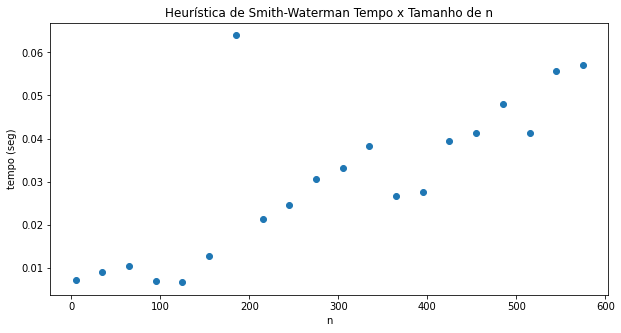

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('n')
ax.set_ylabel('tempo (seg)')
ax.set_title('Heurística de Smith-Waterman Tempo x Tamanho de n')
ax.scatter(valores_n, tempos_sw)
plt.show()

Com o gráfico feito é possível observar, desconsiderando alguns outliers, uma tendência crescente entre o aumento do tempo e o aumento no comprimento das entradas. Além disso, a heurística pode ser considerada eficiente pois, mesmo com altos valores de entrada, a variação do tempo é muito baixa, variando apenas alguns milesegundos.


Visando entender como melhorar a heurística, foi efetuado o profiling para entender os pontos de lentidão e, foi possível observar que eles estavam localizados tanto na leitura quanto na escrita de arquivos, como demonstrado abaixo. A partir disso, foi possível concluir que a implentação do Smith-Waterman é eficiente.

------------------------------
### Algoritmo de Busca Local para Alinhamento

O segundo algoritmo implementado foi o de busca local, que diferente do apresentado acima, conta com aleatoriedade. O fato da aleatoriedade ter sido implementada tras um aspecto positivo ao resultado do alinhamento, podendo transformar a solução em ótima.

Este também, em vez de realizar o alinhamento entre duas sequencias, faz entre uma sequencia e uma subsequencia, a qual é selecionada por aleatoriedade. Além disso, este foi rodado diversas vezes para que fosse possível analisar de forma mais precisa os resultados e o comportamento em relação aos valores aleatórios k, tamnho máximo da subsequencia, e p, quantidade de tentativas de alinhamnetos entre as subsequencias para encontrar o melhor score.

Igual ao algoritmo anterior, foi feito uma média entre os tempos de arquivos com entradas do mesmo tamanho, para melhorar a precisão dos tempos.

In [9]:
tempos_buscaLocal = []
for i in valores_n:
    media = []
    for j in range(0, 30, 5):
        arqs = f'./Entradas/input'+ str(i) + '_'+ str(j)
        out, tempo = roda_com_entrada('./BuscaLocal/main',arqs)
        media.append(tempo)

    tempos_buscaLocal.append(np.mean(media))

Agora com os valores de tempo calculados sobre cada tamanho de entrada N, tamanho da primeira sequencia, foi possível plotar o gráfico abaixo para entender de forma mais visual a performance da busca local.

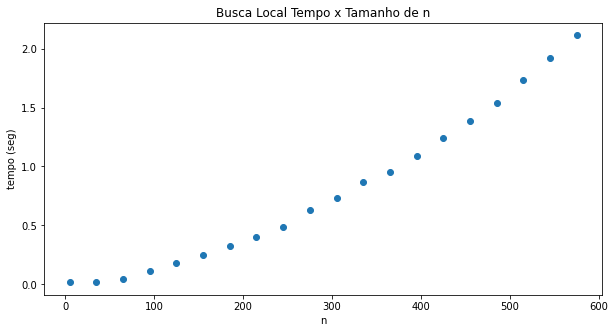

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('n')
ax.set_ylabel('tempo (seg)')
ax.set_title('Busca Local Tempo x Tamanho de n')
ax.scatter(valores_n, tempos_buscaLocal)
plt.show()

Com o segundo gráfico feito, é possível perceber que ambas as estratégias receberam as mesmas quantidades de entradas, porém essa, com o aumento no tamanho das entradas, o tempo para executar o programa aumenta. Porém, isso pode ser explicado pelo fato da busca local ser um arquivo que possui diversas saídas, devido a existencia do P, fazendo com que o tempo de execução do programa fique realmente maior, entretanto este continua razoável. 

Além disso, para entender um pouco mais dessa lentidão, foi rodado o profiling, que além de comprovar o fato mencionado acima, apontou que o cálculo do max score, por ser refeito várias vezes e possuir uma série de for, também carrega o programa, de forma a deixar o tempo de execução maior.

---------------------
### Busca Exaustiva para Alinhamento de Sequencias utilizando a estratégia de alinhamento Local de Smith-Waterman

In [13]:
n_exaustivo = []

for i in range(5,45,5):
    for j in range(0, 30, 5):
        random.seed(10)
        n = i # tamanho da primeira sequência
        m = random.randint(i,80) # tamanho da segunda sequência
        

        file = './Entradas/input_exaustiva'+ str(i) + '_'+ str(j) # nome do arquivo a ser gerado
        f = open(file, 'w')
        seq=[str(n)+'\n',
            str(m)+'\n',
            ''.join(random.choices(['A','T','C','G','-'],k=n))+'\n',
            ''.join(random.choices(['A','T','C','G','-'],k=m))]
        f.writelines(seq)
        f.close()
    
    n_exaustivo.append(n)

In [14]:
tempos_exaust_sw = []
for i in n_exaustivo:
    media = []
    for j in range(0, 30, 5):
        arqs = f'./Entradas/input_exaustiva'+ str(i) + '_'+ str(j)
        out, tempo = roda_com_entrada('./BuscaExaustiva/main_sw',arqs)
        media.append(tempo)

    tempos_exaust_sw.append(np.mean(media))

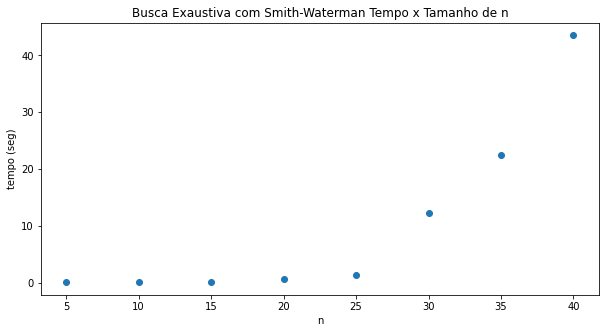

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('n')
ax.set_ylabel('tempo (seg)')
ax.set_title('Busca Exaustiva com Smith-Waterman Tempo x Tamanho de n')
ax.scatter(n_exaustivo, tempos_exaust_sw)
plt.show()

---------------------
### Busca Exaustiva para Alinhamento de Sequencias utilizando a estratégia de truncamento

In [16]:
n_exaustivo_trunc = []

for i in range(5,200,10):
    for j in range(0, 30, 5):
        random.seed(10)
        n = i # tamanho da primeira sequência
        m = random.randint(i,200) # tamanho da segunda sequência
        

        file = './Entradas/input_exaustiva_trunc'+ str(i) + '_'+ str(j) # nome do arquivo a ser gerado
        f = open(file, 'w')
        seq=[str(n)+'\n',
            str(m)+'\n',
            ''.join(random.choices(['A','T','C','G','-'],k=n))+'\n',
            ''.join(random.choices(['A','T','C','G','-'],k=m))]
        f.writelines(seq)
        f.close()

    n_exaustivo_trunc.append(n)
    # print(''.join(seq))

In [17]:
tempos_exaust_trunc = []
for i in n_exaustivo_trunc:
    media = []
    for j in range(0, 30, 5):
        arqs = f'./Entradas/input_exaustiva_trunc'+ str(i) + '_'+ str(j)
        out, tempo = roda_com_entrada('./BuscaExaustiva/main_trunc',arqs)
        media.append(tempo)

    tempos_exaust_trunc.append(np.mean(media))

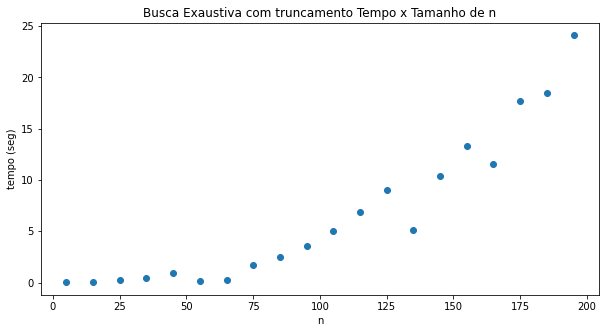

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('n')
ax.set_ylabel('tempo (seg)')
ax.set_title('Busca Exaustiva com truncamento Tempo x Tamanho de n')
ax.scatter(n_exaustivo_trunc, tempos_exaust_trunc)
plt.show()

---------------------
### Conclusão

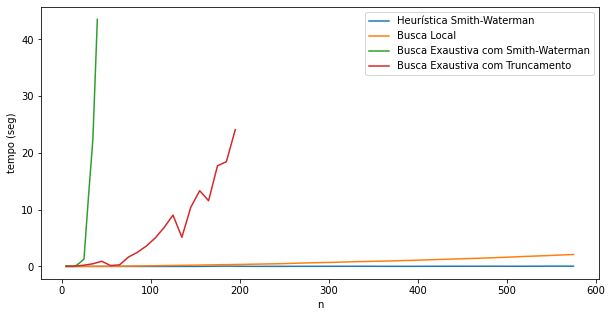

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('n')
ax.set_ylabel('tempo (seg)')
ax.plot(valores_n, tempos_sw, label='Heurística Smith-Waterman')
plt.plot(valores_n, tempos_buscaLocal, label='Busca Local')
ax.plot(n_exaustivo, tempos_exaust_sw, label='Busca Exaustiva com Smith-Waterman')
plt.plot(n_exaustivo_trunc, tempos_exaust_trunc, label='Busca Exaustiva com Truncamento')
plt.legend()
plt.show()

Para comparar os scores de cada uma das estratégias, foi utilizado a mesma entrada em cada uma delas para realizar a comparação:
```
    tamanho da primeira sequencia (n): 15
    tamanho da segunda sequencia (m): 60
    primeira sequencia: CATGTAAC-CTGAGA
    segunda sequencia: -CTT-CTT-G-A-CGTGGTTA--CAATA--T-CAGTCAGTCGCATAA---CG--ACGCA-
```

In [7]:
from tabulate import tabulate
print(tabulate({'Estratégias': ['Heurística', 'Busca Local', 'Busca Exaustiva - SW', 'Busca Exaustiva - truncamento'], 'Sequencia A utilizada': ['CA-T-G--TAA-C-CTG--A-G-A', 'CATGTAAC-CTGAGA', 'CATGTAAC-CTGAGA', 'GTAAC-C'], 'Sequencia B utilizada': ['CAGTCGCATAA---C-G--ACGCA', 'GTCAGTCGCATAA--', '-CTT-CTT-G-A-CGTGGTTA--CAATA--T-CAGTCAGTCGCATAA---CG--ACGCA', 'GTTA--C'], 'High Score': [15, 11, 15, 8]}, headers="keys", tablefmt='fancy_grid', missingval='N/A'))

╒═══════════════════════════════╤══════════════════════════╤═════════════════════════════════════════════════════════════╤══════════════╕
│ Estratégias                   │ Sequencia A utilizada    │ Sequencia B utilizada                                       │   High Score │
╞═══════════════════════════════╪══════════════════════════╪═════════════════════════════════════════════════════════════╪══════════════╡
│ Heurística                    │ CA-T-G--TAA-C-CTG--A-G-A │ CAGTCGCATAA---C-G--ACGCA                                    │           15 │
├───────────────────────────────┼──────────────────────────┼─────────────────────────────────────────────────────────────┼──────────────┤
│ Busca Local                   │ CATGTAAC-CTGAGA          │ GTCAGTCGCATAA--                                             │           11 │
├───────────────────────────────┼──────────────────────────┼─────────────────────────────────────────────────────────────┼──────────────┤
│ Busca Exaustiva - SW          │ 